In [1]:
import tensorflow as tf
import numpy as np

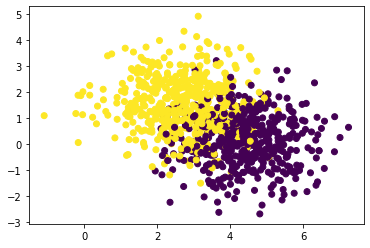

In [71]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=1000, centers=2)
y = y.reshape(-1, 1)

plt.scatter(X[:, 0], X[:, 1], c=y)

In [80]:
class Model:
    
    def __init__(self, input_shape):
        self.layers = []
        self.input_shape = input_shape
    
    def add_layer(self, layer_type, n_count, activation):
        
        if layer_type == "dense":

            if len(self.layers) == 0:
                prev = self.input_shape
            else:
                [prev_w, prev_bias, prev_act] = self.layers[-1]
                prev = prev_bias.shape[0]
            w = tf.Variable(np.random.randn(prev, n_count))
            b = tf.Variable(np.random.randn(n_count))
            self.layers.append((w, b, activation))
            
    def forward(self, data):
        
        generated = []
        
        generated.append(data)
        
        for [w, b, act] in self.layers:
            data = act(tf.matmul(data, w) + b)
            generated.append(data)
            
        return generated
    
    def backprop(self, generated, expected):
        
        error = expected - generated[-1]
        for idx in range(len(generated)-1, 0, -1):
            
            with tf.GradientTape() as tape:
                w, b, act = self.layers[idx-1]
                print(error.shape, w.shape, b.shape)
                sme =  tf.reduce_mean(error * error, axis=0)
                print(sme)
                dw, db = tape.gradient(sme, [w, b])
                print(dw, db)
            
            w.assign(w - .1 * dw)
            b.assign(w - .1 * db)
            
    def fit(self, X, y):
        gen = self.forward(X)
        self.backprop(gen, y)
            

In [81]:
def sigmoid(data):
    return 1 /(1 + tf.math.exp(-data))

model = Model(input_shape=2)
model.add_layer("dense", 1, sigmoid)

In [82]:
model.fit(X, y)

(1000, 1) (2, 1) (1,)
tf.Tensor([0.65249771], shape=(1,), dtype=float64)
None None


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'